In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def log_RegretMean_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = (np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   
    

In [3]:
def Mean_log_Regret_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = (np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    total_record = np.log10(total_record)
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   

Text(0.5, 1.0, 'Ackley 2D')

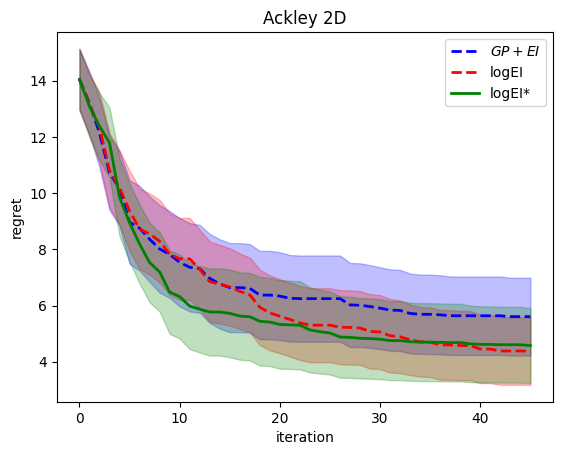

In [4]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley2D_SLogGP(boundary)+logEI'), delimiter=',')
# SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Ackley6D_SLogGP(boundary)+logTEI'), delimiter=',')

fstar =  0.
log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Ackley 2D')

Text(0.5, 1.0, 'Ackley 6D')

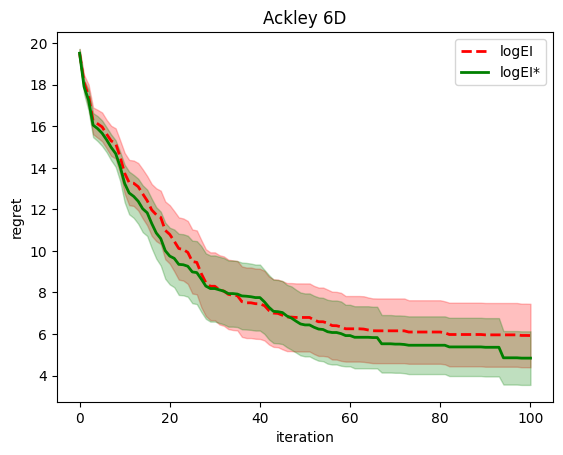

In [3]:
#BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logEI'), delimiter=',')
# SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Ackley6D_SLogGP(boundary)+logTEI'), delimiter=',')

fstar =  0.
#log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Ackley 6D')

Text(0.5, 1.0, 'DixonPrice 2D')

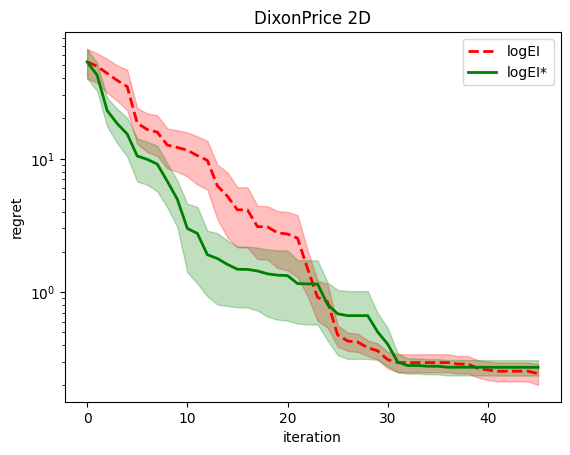

In [5]:
#BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice2D_SLogGP(boundary)+logEI'), delimiter=',')
# SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Ackley6D_SLogGP(boundary)+logTEI'), delimiter=',')

fstar =  0.
#log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)


plt.yscale("log") 

plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('DixonPrice 2D')

Text(0.5, 1.0, 'Rosenbrock 2D')

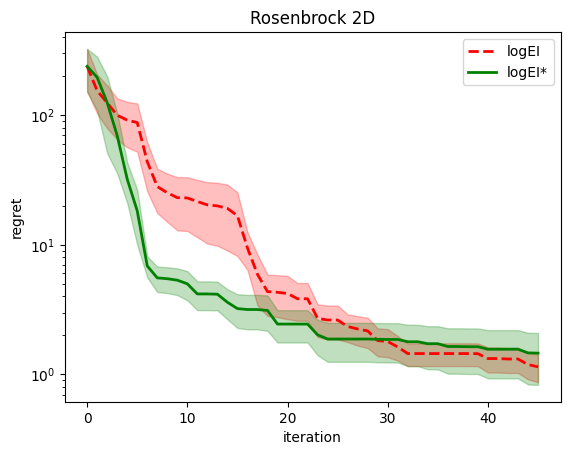

In [4]:
#BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock2D_SLogGP(boundary)+logEI'), delimiter=',')
# SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Ackley6D_SLogGP(boundary)+logTEI'), delimiter=',')

fstar =  0.
#log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)


plt.yscale("log") 

plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Rosenbrock 2D')

Text(0.5, 1.0, 'Rosenbrock 5D')

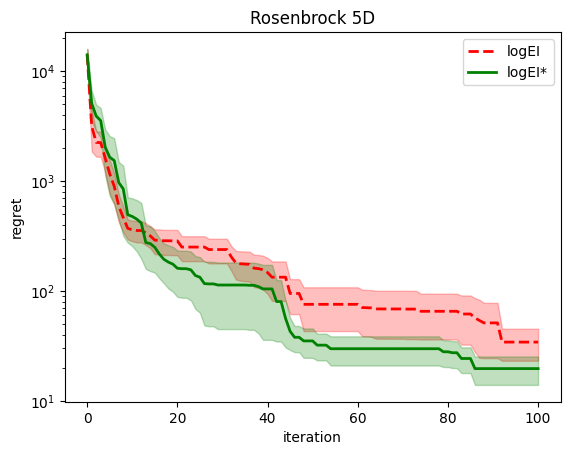

In [6]:
#BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logEI'), delimiter=',')
# SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Ackley6D_SLogGP(boundary)+logTEI'), delimiter=',')

fstar =  0.
#log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)


plt.yscale("log") 

plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Rosenbrock 5D')

Text(0.5, 1.0, 'Powell 8D')

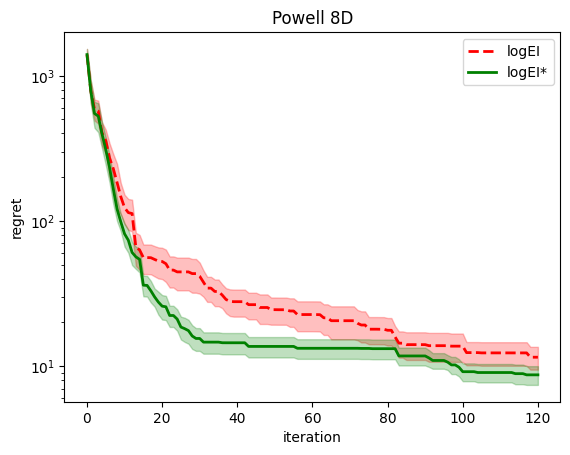

In [20]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logEI'), delimiter=',')



fstar = 0.


log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)



plt.xlabel('iteration')
plt.ylabel('regret')

plt.yscale("log") 

plt.legend()
plt.title('Powell 8D')

Text(0.5, 1.0, 'Branin 2D')

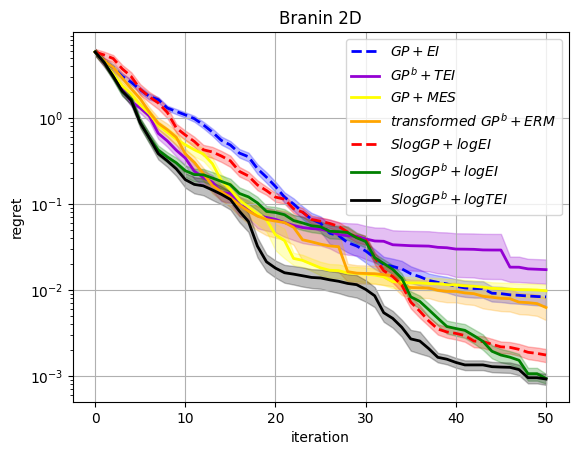

In [18]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.397887

log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Branin 2D')

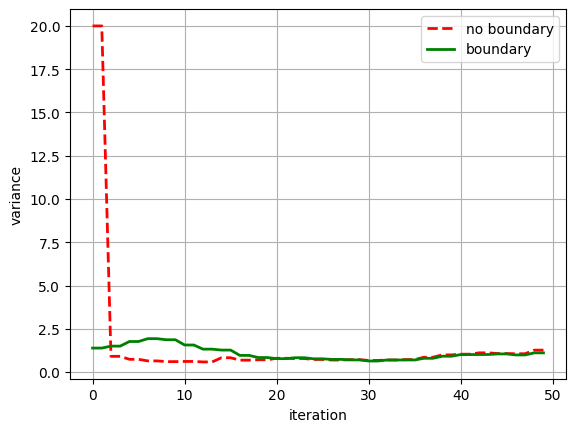

In [19]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI_varianceValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI_varianceValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')


plt.xlabel('iteration')
plt.ylabel('variance')

plt.grid()
plt.legend()

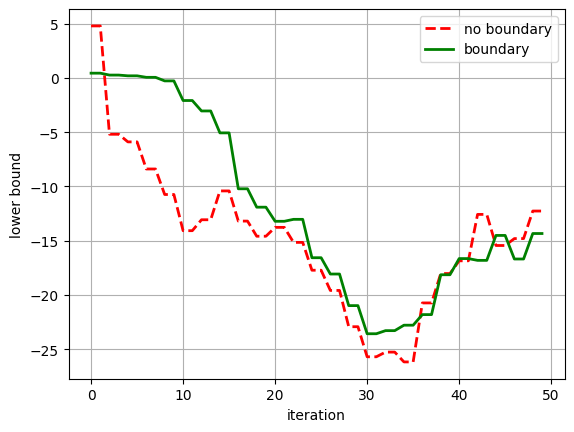

In [5]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

Text(0.5, 1.0, 'Beale 2D')

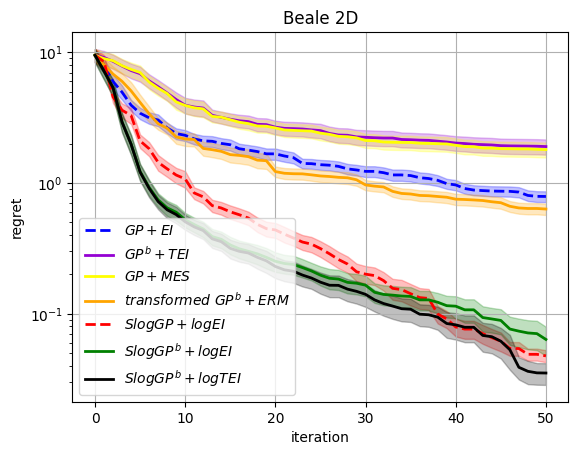

In [20]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Beale 2D')

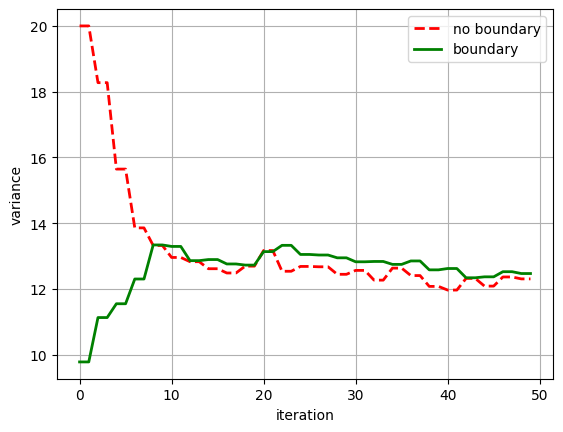

In [7]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI_varianceValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logEI_varianceValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('variance')

plt.grid()
plt.legend()

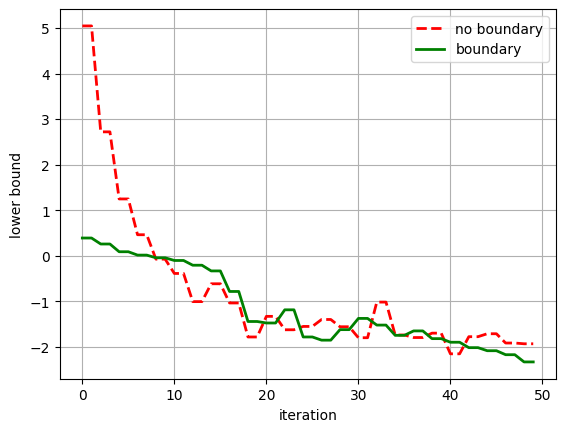

In [8]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

Text(0.5, 1.0, 'SixHumpCamel 2D')

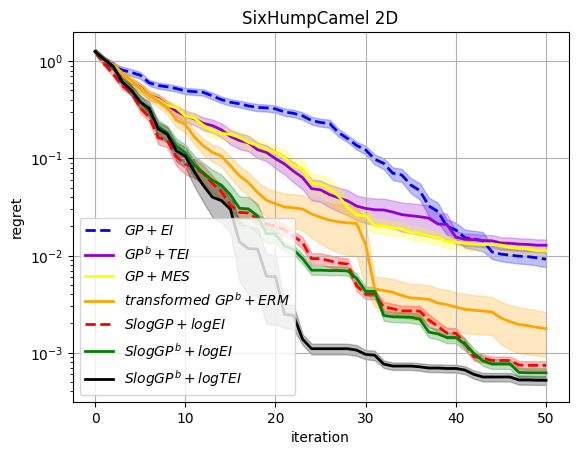

In [21]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = -1.0317

log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()
plt.yscale("log") 

plt.legend()
plt.title('SixHumpCamel 2D')

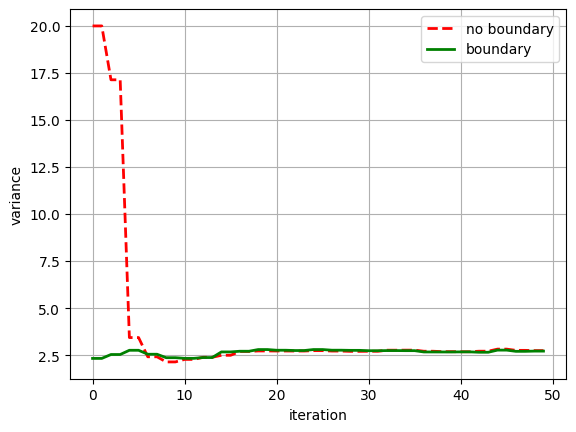

In [10]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI_varianceValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logEI_varianceValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')


plt.xlabel('iteration')
plt.ylabel('variance')

plt.grid()
plt.legend()

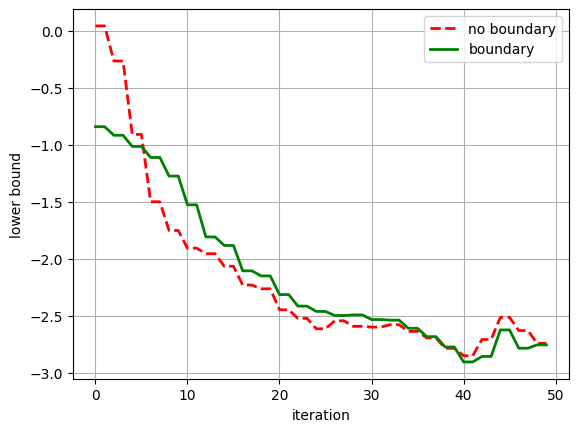

In [11]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

Text(0.5, 1.0, 'Hartmann 3D')

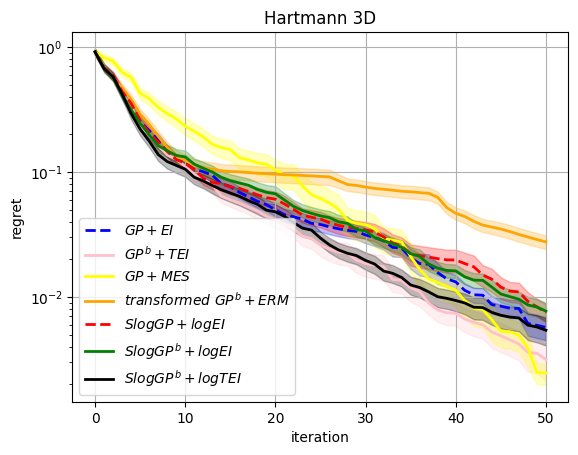

In [10]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =  -3.86278

log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='pink',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)



plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Hartmann 3D')

Text(0.5, 1.0, 'Push 4D')

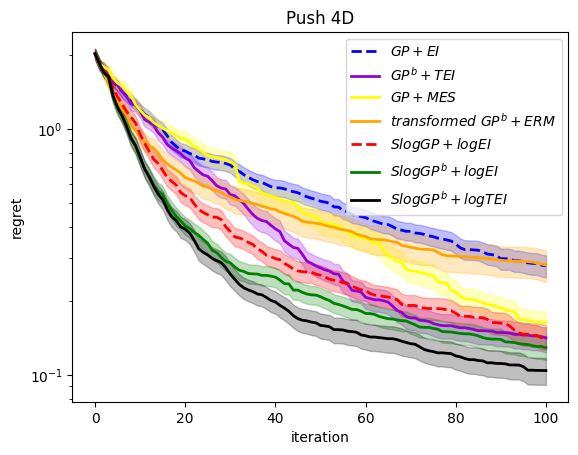

In [3]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Push 4D')

In [30]:
SLogGP_boundary_logEI[1]

array([2.89104145, 2.45578872, 1.52854846, 0.45133831, 0.28978928,
       0.28978928, 0.28978928, 0.28978928, 0.28978928, 0.28978928,
       0.28978928, 0.28978928, 0.28978928, 0.28978928, 0.28978928,
       0.28978928, 0.28978928, 0.28978928, 0.28978928, 0.28978928,
       0.28978928, 0.28978928, 0.28978928, 0.28978928, 0.28978928,
       0.28978928, 0.28978928, 0.28194735, 0.19392863, 0.19392863,
       0.19392863, 0.19392863, 0.19392863, 0.19392863, 0.19392863,
       0.19392863, 0.19392863, 0.19392863, 0.19392863, 0.19392863,
       0.19392863, 0.19392863, 0.19392863, 0.19392863, 0.19392863,
       0.19392863, 0.19392863, 0.19392863, 0.19392863, 0.19392863,
       0.19392863, 0.19392863, 0.19392863, 0.19392863, 0.19392863,
       0.19392863, 0.19392863, 0.19392863, 0.19392863, 0.19392863,
       0.19392863, 0.19392863, 0.19392863, 0.19392863, 0.19392863,
       0.19392863, 0.19392863, 0.19392863, 0.19392863, 0.19392863,
       0.19392863, 0.19392863, 0.19392863, 0.19392863, 0.19392

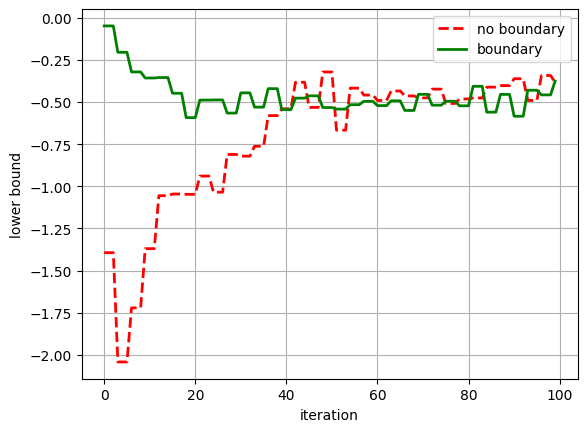

In [22]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/push_0.25/Push4D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

In [16]:
np.mean(SLogGP_boundary_logEI,0)

array([2.02783096, 1.84839159, 1.6744345 , 1.62542484, 1.38800946,
       1.26336272, 1.16775205, 1.09036036, 0.99512907, 0.9280612 ,
       0.86037375, 0.82503002, 0.78534773, 0.75111508, 0.70092941,
       0.6566482 , 0.62952033, 0.58766771, 0.56927663, 0.54234017,
       0.52472552, 0.51401628, 0.50347846, 0.47914358, 0.46680685,
       0.4479489 , 0.43838028, 0.42822641, 0.41992722, 0.39525445,
       0.38629758, 0.37542868, 0.36002776, 0.35301619, 0.34652237,
       0.3236096 , 0.31618265, 0.30748829, 0.3035584 , 0.29694265,
       0.28926422, 0.27845831, 0.27641519, 0.27613442, 0.27164195,
       0.26262707, 0.2567344 , 0.24859682, 0.24551026, 0.24052841,
       0.2337676 , 0.2305652 , 0.22682498, 0.22682498, 0.2265386 ,
       0.22617537, 0.22582757, 0.22322132, 0.22203022, 0.22044705,
       0.21648585, 0.21539933, 0.21405856, 0.2126847 , 0.20876914,
       0.20560848, 0.20513785, 0.19690886, 0.1958026 , 0.18675477,
       0.18396665, 0.18239755, 0.18074252, 0.18014984, 0.17611

Text(0.5, 1.0, 'Skin 6D')

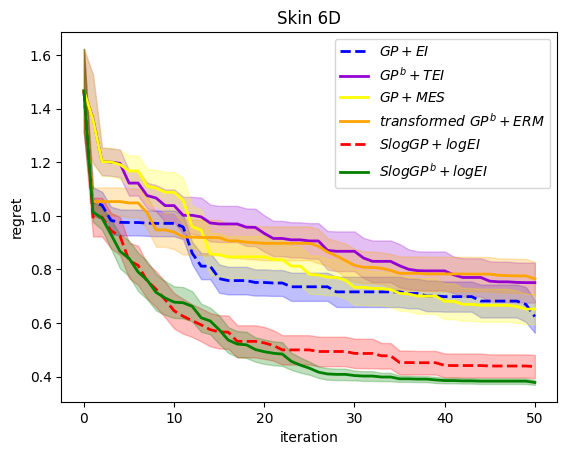

In [18]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI'), delimiter=',')
#SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
#log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Skin 6D')

Text(0.5, 1.0, 'Skin 6D')

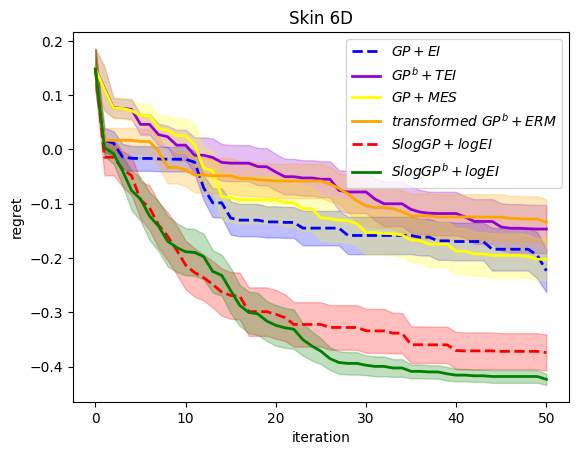

In [4]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI'), delimiter=',')
#SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

Mean_log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
Mean_log_Regret_plot(BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='darkviolet',linestyle='-',error_bound=True)
Mean_log_Regret_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
Mean_log_Regret_plot(BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
Mean_log_Regret_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
Mean_log_Regret_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
#Mean_log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Skin 6D')


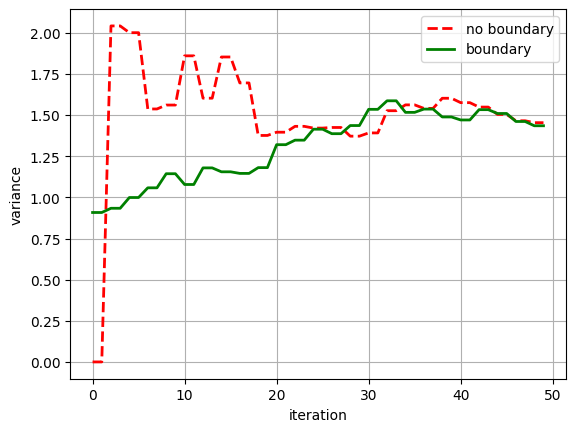

In [4]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI_varianceValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI_varianceValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')


plt.xlabel('iteration')
plt.ylabel('variance')

plt.grid()
plt.legend()

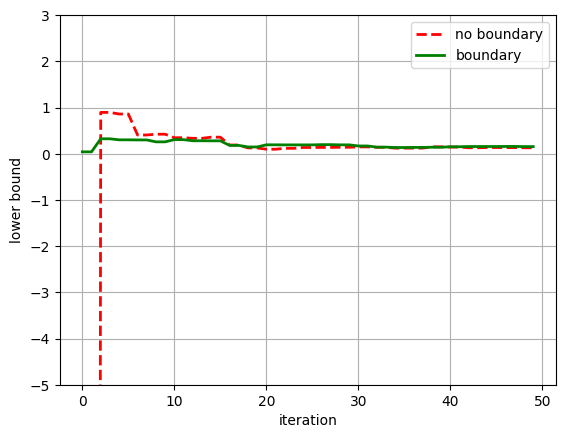

In [6]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('lower bound')
plt.ylim([-5,3])
plt.grid()
plt.legend()

Text(0.5, 1.0, 'bank 6D')

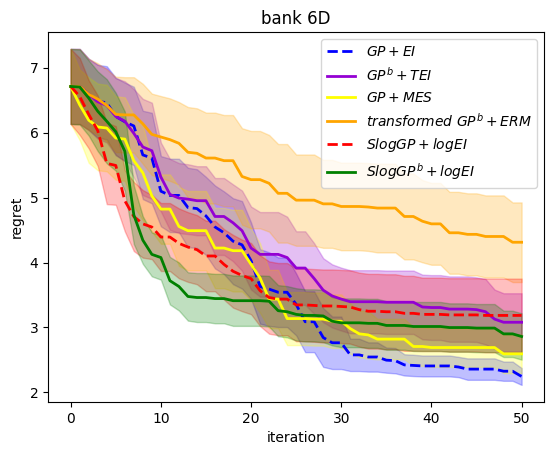

In [7]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP(boundary)+logEI'), delimiter=',')
#SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
#log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('bank 6D')

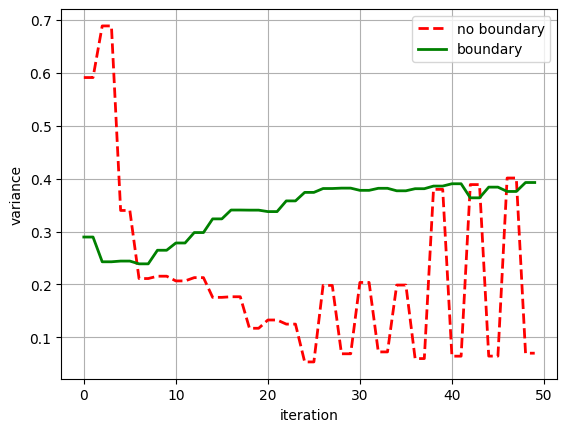

In [8]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP+logEI_varianceValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP(boundary)+logEI_varianceValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')


plt.xlabel('iteration')
plt.ylabel('variance')

plt.grid()
plt.legend()

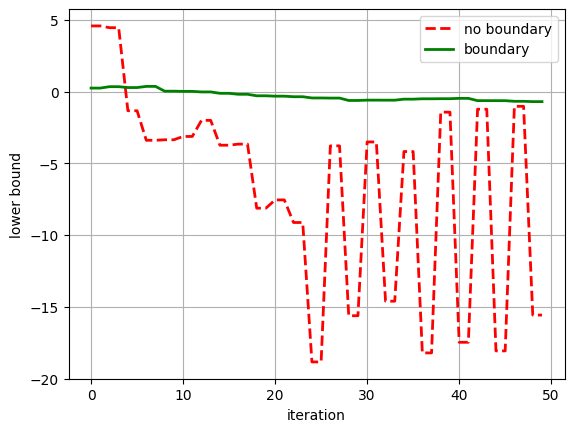

In [9]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('lower bound')
#plt.ylim([-5,3])
plt.grid()
plt.legend()

Text(0.5, 1.0, 'bank 6D')

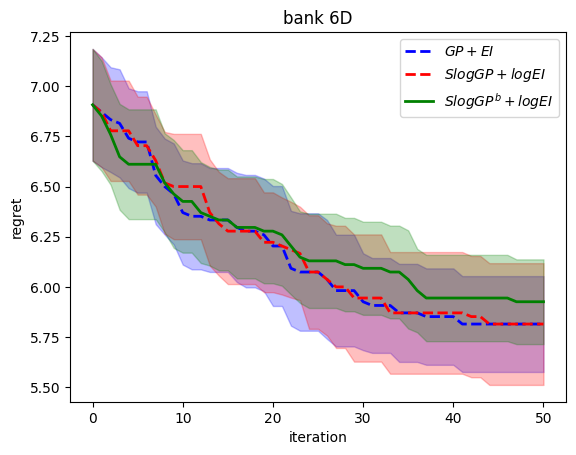

In [4]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/breast_GP+EI'), delimiter=',')
# BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_GP+TEI'), delimiter=',')
# BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_GP+MES'), delimiter=',')
# BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/bank_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/breast_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/breast_SLogGP(boundary)+logEI'), delimiter=',')
# SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='darkviolet',linestyle='-',error_bound=True)
# log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
# log_RegretMean_plot(BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
#log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('bank 6D')

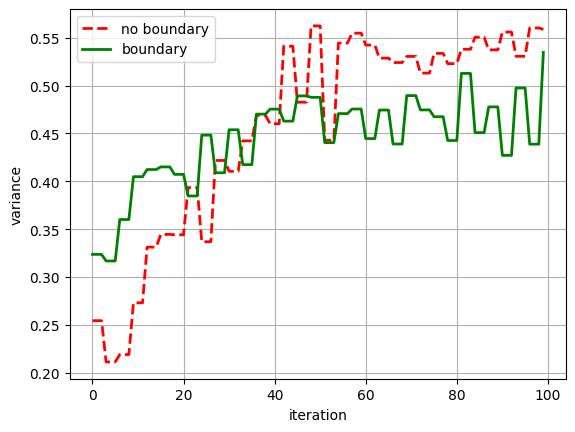

In [4]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP+logEI_varianceValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logEI_varianceValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')


plt.xlabel('iteration')
plt.ylabel('variance')

plt.grid()
plt.legend()

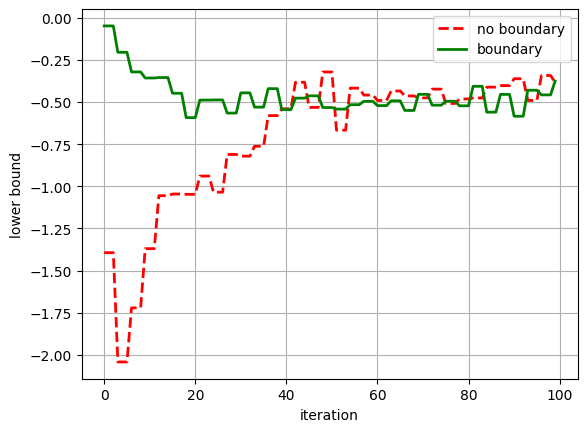

In [5]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

Text(0.5, 1.0, 'Push 4D')

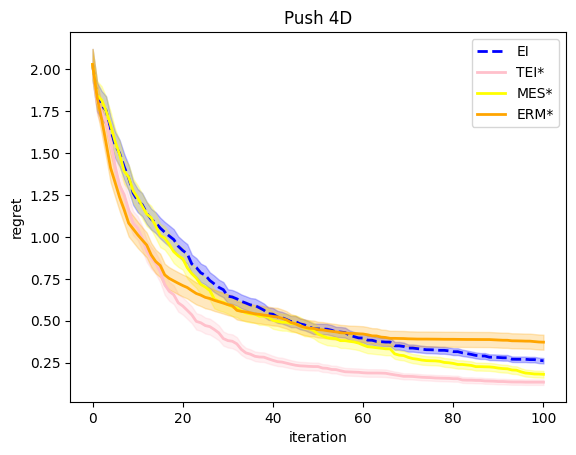

In [6]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Push4D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Push4D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Push4D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Push4D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Push4D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Push4D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Push4D_SLogGP(boundary)+logTEI'), delimiter=',')


#N = 12
fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='TEI*',color='pink',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='MES*',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='ERM*',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='logTEI*',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Push 4D')

Text(0.5, 1.0, 'Powell 4D')

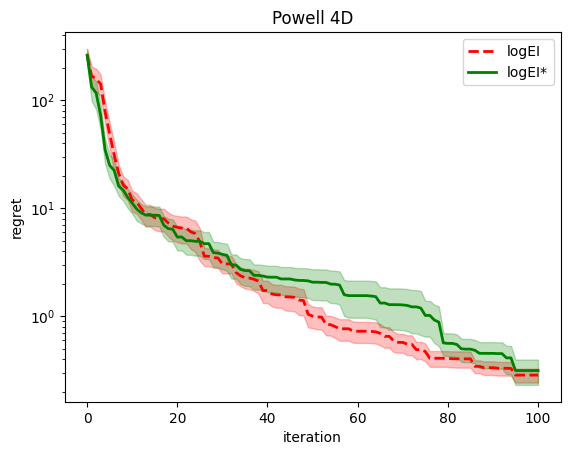

In [22]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Powell4D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Powell4D_SLogGP(boundary)+logEI'), delimiter=',')



fstar = 0.

log_RegretMean_plot(SLogGP_logEI[:20],fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI[:20],fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)


plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Powell 4D')

In [ ]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Powell8D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Powell8D_SLogGP(boundary)+logEI'), delimiter=',')



fstar = 0.

log_RegretMean_plot(SLogGP_logEI[:20],fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI[:20],fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)

plt.yscale("log") 

plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Powell 8D')

Text(0.5, 1.0, 'Powell 8D')

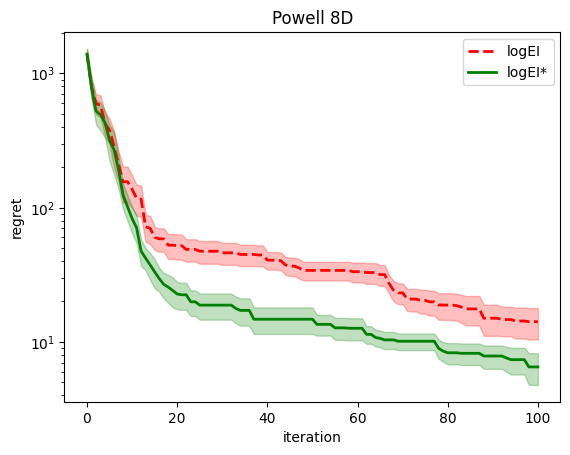

In [21]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Powell8D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Powell8D_SLogGP(boundary)+logEI'), delimiter=',')



fstar = 0.

log_RegretMean_plot(SLogGP_logEI[:20],fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI[:20],fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)

plt.yscale("log") 

plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Powell 8D')

Text(0.5, 1.0, 'Rosenbrock 5D')

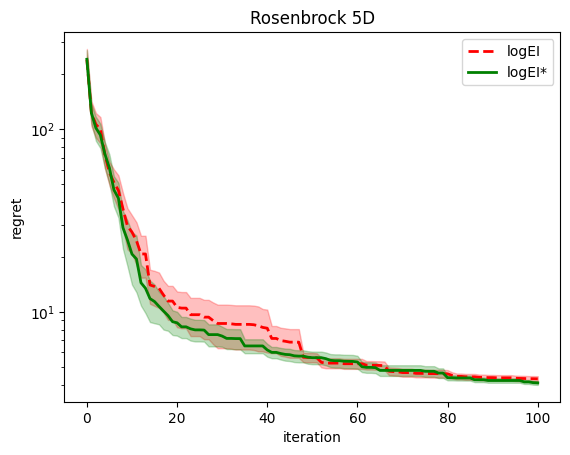

In [14]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Rosenbrock5D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Rosenbrock5D_SLogGP(boundary)+logEI'), delimiter=',')



fstar = 0.

log_RegretMean_plot(SLogGP_logEI[:20],fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI[:20],fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)



plt.xlabel('iteration')
plt.ylabel('regret')

plt.yscale("log") 

plt.legend()
plt.title('Rosenbrock 5D')

Text(0.5, 1.0, 'Rosenbrock 10D')

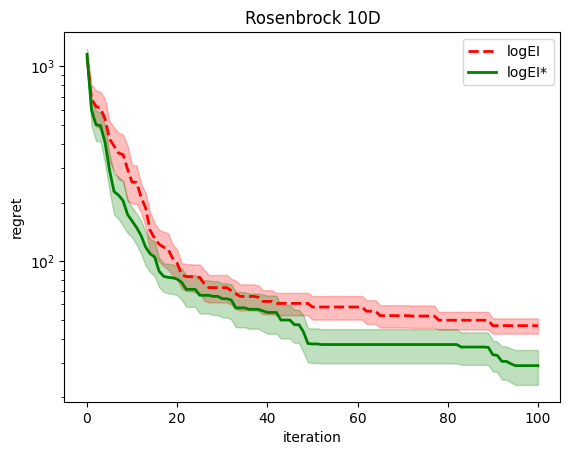

In [15]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Rosenbrock10D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/Rosenbrock10D_SLogGP(boundary)+logEI'), delimiter=',')



fstar = 0.

log_RegretMean_plot(SLogGP_logEI[:20],fstar=fstar,label='logEI',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI[:20],fstar=fstar,label='logEI*',color='green',linestyle='-',error_bound=True)


plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('regret')

plt.legend()
plt.title('Rosenbrock 10D')

Text(0.5, 1.0, 'Bank 6D')

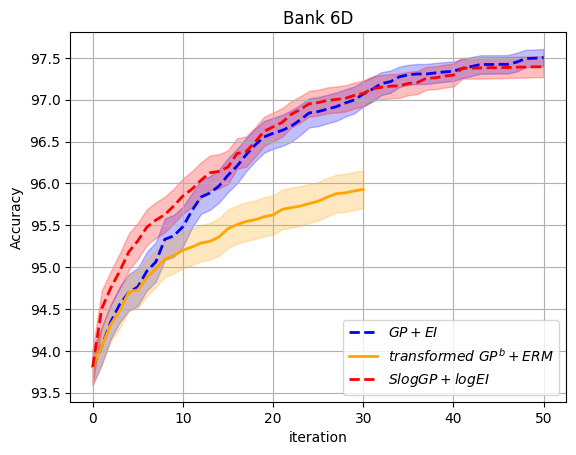

In [42]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/bank_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/bank_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/bank_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/bank_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/bank_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/bank_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/bank_SLogGP(boundary)+logTEI'), delimiter=',')


N = 100
fstar = 0.

log_RegretMean_plot(100-BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(100-BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='pink',linestyle='-',error_bound=True)
# log_RegretMean_plot(100-BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(100-BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(100-SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(100-SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
# log_RegretMean_plot(100-SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('Accuracy')

plt.grid()

plt.legend()
plt.title('Bank 6D')

In [34]:
SLogGP_boundary_logEI[12]

array([5.18514861, 5.18514861, 5.18514861, 5.18514861, 5.18514861,
       5.18514861, 5.18514861, 5.18514861, 5.18514861, 5.18514861,
       5.18514861, 5.18514861, 5.18514861, 5.18514861, 5.10417695,
       5.10417695, 5.10417695, 5.10417695, 5.10417695, 5.10417695,
       5.02550936, 5.02550936, 5.02550936, 5.02550936, 5.02550936,
       5.02550936, 5.02550936, 5.02550936, 5.02550936, 5.02550936,
       5.02550936, 5.02550936, 5.02550936, 4.94256279, 4.94256279,
       4.94256279, 4.94256279, 4.94256279, 4.94256279, 4.94256279,
       4.78292354, 4.78292354, 4.78292354, 4.78292354, 4.37773609,
       4.37773609, 4.37773609, 4.37773609, 4.37773609, 4.37773609,
       4.37773609])

In [40]:
np.sum(BO_EI[:,-1]>4)

2

Text(0.5, 1.0, 'Skin 6D')

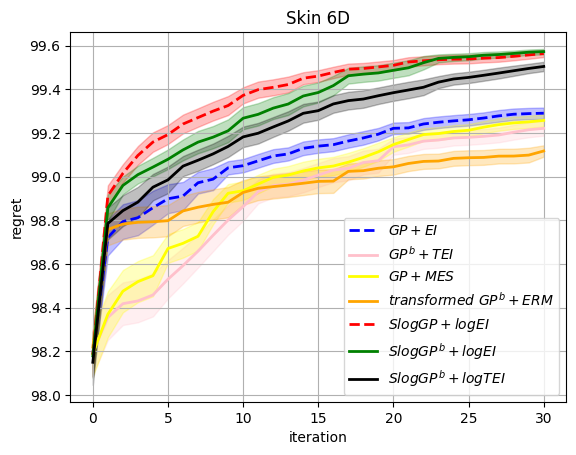

In [17]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/skin_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/skin_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/skin_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/skin_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/skin_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/skin_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'exp_res/skin_SLogGP(boundary)+logTEI'), delimiter=',')


N = 100
fstar = 0.

log_RegretMean_plot(100-BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='pink',linestyle='-',error_bound=True)
log_RegretMean_plot(100-BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(100-BO_ERM,fstar=fstar,label='$transformed ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(100-SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(100-SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.legend()
plt.title('Skin 6D')

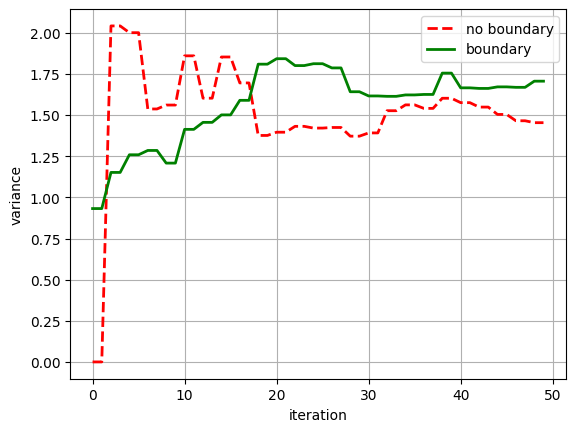

In [7]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI_varianceValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI_varianceValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')


plt.xlabel('iteration')
plt.ylabel('variance')

plt.grid()
plt.legend()